In [1]:
import pandas as pd
data  = pd.read_csv("framingham.csv")
data_verify = data.copy()

In [2]:
# for mathematical calculations
import numpy as np

# to visualize the data and results
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.impute import SimpleImputer


# to build the model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, recall_score, f1_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split , cross_val_score, RandomizedSearchCV


# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.shape

(4240, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
print(data.select_dtypes(include=['float64','int64']).columns) #Printing the Names on all the Numerical Columns
print(len(data.select_dtypes(include=['float64','int64']).columns)) #Printing the total number of Numerical Columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
16


In [7]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())  # Checking the total Null Values of the whole data set 
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) #No of Columns with Missing Valeus
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) #Checking the Name of the columns with null values

Total Missing Values from the whole data set are:  645
Number of Columns with Missing Values are:  7
Names of the Columns with Missing Values are:  Index(['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


In [9]:
#the columns we want to fill missing values for

selected_cols = ['education', 'cigsPerDay', 'BPMeds','totChol','BMI','heartRate','glucose']


mean_values = data[selected_cols].mean()

# Replace missing and NaN values with mean values for the selected columns
data[selected_cols] = data[selected_cols].fillna(mean_values)

#df.to_csv('new_file.csv', index=False)

In [10]:

print(data.shape)

(4240, 16)


In [11]:

print(data.shape)

(4240, 16)


In [12]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
 # Checking the total Null Values of the whole data set
print(f'Total Missing Values from the whole data set are: ', data.isnull().values.sum())
  
#No of Columns with Missing Valeus
print(f'Number of Columns with Missing Values are: ', len(data.columns[data.isnull().any()])) 

#Checking the Name of the columns with null values
print(f'Names of the Columns with Missing Values are: ', data.columns[data.isnull().any()]) 

Total Missing Values from the whole data set are:  0
Number of Columns with Missing Values are:  0
Names of the Columns with Missing Values are:  Index([], dtype='object')


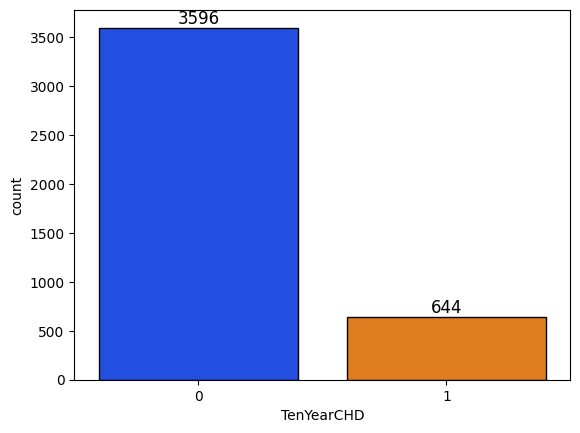

Total Values: 4240


In [14]:
import matplotlib.pyplot as plt

sns.countplot(x='TenYearCHD',data=data,palette='bright',edgecolor='black')
#plt.hist(data["TenYearCHD"]);


for i in range(len(data['TenYearCHD'].value_counts())):
    count = data['TenYearCHD'].value_counts()[i]
    label = count
    plt.annotate(label, (i, count), ha='center', va='bottom', fontsize=12)

plt.show()

print(f'Total Values:',  data.TenYearCHD.count()) 

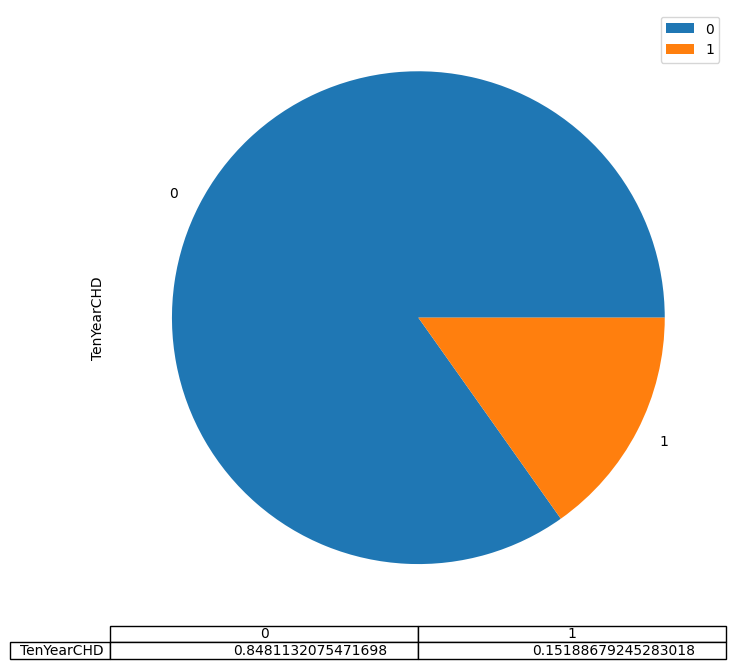

In [15]:
data["TenYearCHD"].value_counts(normalize=True).plot(kind="pie", legend=True, table=True, figsize=(10,8));

In [16]:
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(3392, 15)
(848, 15)
(3392,)
(848,)


In [ ]:
X_test = pd.DataFrame(X_test)
print(X_test.index.values)

In [ ]:
display(data_verify.loc[4193])

In [19]:
#Feature Scaling

scaler= StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# from imblearn.over_sampling import SMOTE
# smt = SMOTE()
# X_train, y_train = smt.fit_resample(X_train, y_train)
# X_test, y_test = smt.fit_resample(X_test, y_test)

In [21]:
# Naive bayes

from sklearn.naive_bayes import GaussianNB

# Create Naive Bayes classifier object and train on the training data
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# from sklearn.model_selection import GridSearchCV
# params = {'alpha': [0.1, 1.0, 10.0]}
# nb_clf = GridSearchCV(GaussianNB(), params, cv=5)
# nb_clf.fit(X_train, y_train)
# print(nb_clf.best_params_)



GaussianNB()

ACCURACY FROM TRAINING DATASET :
Accuracy score:  82.22
Confusion matrix: 
 [[2674  197]
 [ 406  115]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8682    0.9314    0.8987      2871
           1     0.3686    0.2207    0.2761       521

    accuracy                         0.8222      3392
   macro avg     0.6184    0.5761    0.5874      3392
weighted avg     0.7914    0.8222    0.8030      3392

ACCURACY FROM Test DATASET :
Accuracy score:  83.37
Confusion matrix: 
 [[686  39]
 [102  21]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8706    0.9462    0.9068       725
           1     0.3500    0.1707    0.2295       123

    accuracy                         0.8337       848
   macro avg     0.6103    0.5585    0.5682       848
weighted avg     0.7951    0.8337    0.8086       848



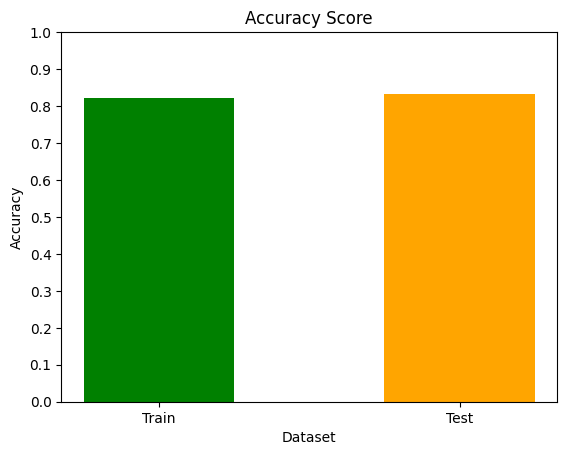

In [22]:
# evaluate the model


nb_train_pred = nb_clf.predict(X_train)
nb_y_pred = nb_clf.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred))
print("Classification report: \n",classification_report(y_train,nb_train_pred,digits=4))


print("ACCURACY FROM Test DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred))
print("Classification report: \n",classification_report(y_test,nb_y_pred,digits=4))

#plotting graph
train_acc = accuracy_score(y_train, nb_train_pred)
test_acc = accuracy_score(y_test, nb_y_pred)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [23]:
#Random forest




rf_clf = RandomForestClassifier(max_depth=6 ,n_estimators=5, criterion = 'entropy', random_state=0)
rf_clf.fit(X_train,y_train)




RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=5,
                       random_state=0)

ACCURACY FROM TRAINING DATASET :
Accuracy score:  85.64
Confusion matrix: 
 [[2864    7]
 [ 480   41]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8565    0.9976    0.9216      2871
           1     0.8542    0.0787    0.1441       521

    accuracy                         0.8564      3392
   macro avg     0.8553    0.5381    0.5329      3392
weighted avg     0.8561    0.8564    0.8022      3392

 ACCURACY FROM TESTING DATASET :
Accuracy score:  85.37735849056604
Confusion matrix: 
 [[722   3]
 [121   2]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8565    0.9959    0.9209       725
           1     0.4000    0.0163    0.0313       123

    accuracy                         0.8538       848
   macro avg     0.6282    0.5061    0.4761       848
weighted avg     0.7903    0.8538    0.7919       848



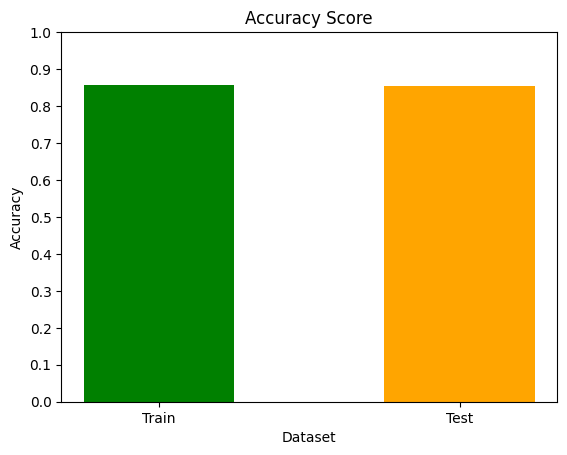

In [24]:
y_rfc_train_pred = rf_clf.predict(X_train)
y_rfc_test_pred = rf_clf.predict(X_test)



print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))

print(" ACCURACY FROM TESTING DATASET :")
print("Accuracy score: ",accuracy_score(y_test,y_rfc_test_pred)*100)
print("Confusion matrix: \n",confusion_matrix(y_test,y_rfc_test_pred))
print("Classification report: \n",classification_report(y_test,y_rfc_test_pred,digits=4))

#plotting graph
train_acc = accuracy_score(y_train, y_rfc_train_pred)
test_acc = accuracy_score(y_test, y_rfc_test_pred)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()

In [25]:
#pred=nb_clf.predict(n)
#print(pred)
#pred=RFC1.predict(n)
#print(pred)
#print(len(pred))

In [26]:
#ANN

from keras.models import Sequential
from keras.layers import Dense
# import torch
# import torch.nn as nn
# import torch.nn.functional as F

In [27]:
# import libraries
import tensorflow as tf
from tensorflow import keras

In [28]:

# define the model
ann_clf = keras.Sequential([
    keras.layers.Dense(15, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [29]:

# compile the model
ann_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
# train the model


hist=ann_clf.fit(X_train,y_train,batch_size = 57, epochs=450,validation_split=0.2)

Epoch 1/450
48/48 [==============================] - 2s 10ms/step - loss: 0.8712 - accuracy: 0.2462 - val_loss: 0.7566 - val_accuracy: 0.4433
Epoch 2/450
48/48 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.5691 - val_loss: 0.6586 - val_accuracy: 0.6937
Epoch 3/450
48/48 [==============================] - 0s 3ms/step - loss: 0.6102 - accuracy: 0.7811 - val_loss: 0.5636 - val_accuracy: 0.8277
Epoch 4/450
48/48 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.8341 - val_loss: 0.4882 - val_accuracy: 0.8424
Epoch 5/450
48/48 [==============================] - 0s 4ms/step - loss: 0.4614 - accuracy: 0.8426 - val_loss: 0.4437 - val_accuracy: 0.8498
Epoch 6/450
48/48 [==============================] - 0s 3ms/step - loss: 0.4316 - accuracy: 0.8441 - val_loss: 0.4204 - val_accuracy: 0.8483
Epoch 7/450
48/48 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8452 - val_loss: 0.4060 - val_accuracy: 0.8513
Epoch 8/450


106/106 [==============================] - 0s 3ms/step
TRAINING
Accuracy Score: 0.8752948113207547
Confusion Matrix: [[2820   51]
 [ 372  149]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.98      0.93      2871
           1       0.74      0.29      0.41       521

    accuracy                           0.88      3392
   macro avg       0.81      0.63      0.67      3392
weighted avg       0.86      0.88      0.85      3392

TESTING
Accuracy Score: 0.8183962264150944
Confusion Matrix: [[684  41]
 [113  10]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.94      0.90       725
           1       0.20      0.08      0.11       123

    accuracy                           0.82       848
   macro avg       0.53      0.51      0.51       848
weighted avg       0.76      0.82      0.79       848



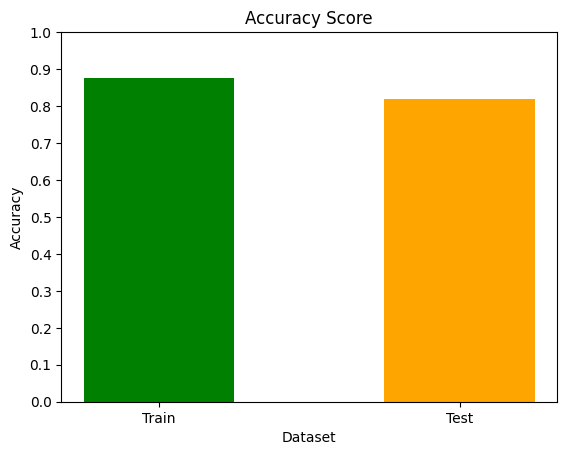

In [31]:
# evaluate the model
y_pred_ann = np.round(ann_clf.predict(X_test))
y_ann_train_pred = np.round(ann_clf.predict(X_train))
print("TRAINING")
print('Accuracy Score:', accuracy_score(y_train, y_ann_train_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_ann_train_pred))
print('Classification Report:', classification_report(y_train, y_ann_train_pred))
print("TESTING")
print('Accuracy Score:', accuracy_score(y_test, y_pred_ann))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_ann))
print('Classification Report:', classification_report(y_test, y_pred_ann))

#plotting graph
train_acc = accuracy_score(y_train, y_ann_train_pred)
test_acc = accuracy_score(y_test, y_pred_ann)

# create a bar chart to display accuracy scores
fig, ax = plt.subplots()
ax.bar([0.2, 0.6], [train_acc, test_acc], color=['green', 'orange'], width=0.2)
ax.set_title('Accuracy Score')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticks([0.2, 0.6])
ax.set_xticklabels(['Train', 'Test'])
ax.set_ylim([0, 1])
ax.set_yticks([i*0.1 for i in range(11)])
plt.show()


27/27 [==============================] - 0s 2ms/step


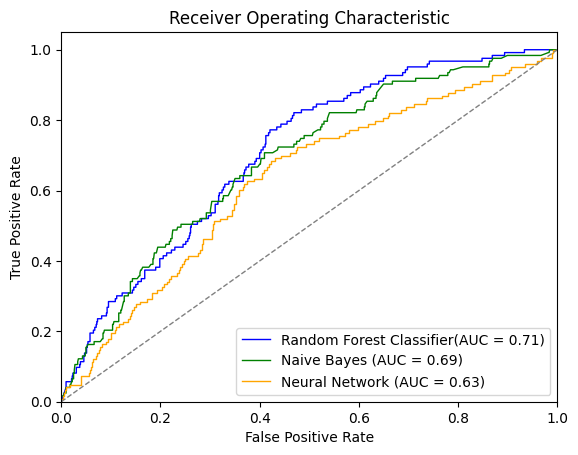

In [32]:
#ROC AUC

from sklearn.metrics import roc_curve, auc

# Predict probabilities for test set for all three models
y_pred_proba_rf = nb_clf.predict_proba(X_test)[:, 1]
y_pred_proba_nb = rf_clf.predict_proba(X_test)[:, 1]
y_pred_proba_nn = ann_clf.predict(X_test)[:, 0]

# Compute ROC curve and ROC area for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_logreg = auc(fpr_rf, tpr_rf)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot ROC curve
plt.plot(fpr_rf, tpr_rf, color='blue', lw=1, label='Random Forest Classifier(AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, color='green', lw=1, label='Naive Bayes (AUC = %0.2f)' % roc_auc_nb)
plt.plot(fpr_nn, tpr_nn, color='orange', lw=1, label='Neural Network (AUC = %0.2f)' % roc_auc_nn)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [33]:
import gradio as gr  

In [34]:
#gradio with 8 fetaures

def input(male, age, education, currentSmoker, cigsPerDay, BPMeds,
       prevalentStroke, prevalentHyp, diabetes, totChol, sysBP,
       diaBP, BMI, heartRate, glucose):

    new_values = pd.DataFrame({
    'male': [male] ,
    'age': [age],
    'education': [education],
    'currentSmoker': [currentSmoker],
    'cigsPerDay': [cigsPerDay],
    'BPMeds': [BPMeds],
    'prevalentStroke': [prevalentStroke],
    'prevalentHyp': [prevalentHyp],
    'diabetes': [diabetes],
    'totChol': [totChol],
    'sysBP': [sysBP],
    'diaBP': [diaBP],
    'BMI': [BMI],
    'heartRate': [heartRate],
    'glucose': [glucose]

    })
    new_values_scaled = scaler.transform(new_values)
    new_prediction = np.round(ann_clf.predict(new_values_scaled))
    return new_prediction



In [35]:


interface = gr.Interface(fn=input,
                    inputs=["number","number","number","number","number","number","number","number","number","number","number","number","number","number","number"],
                    outputs=['text'],
                    title="Hearte Disease Prediction Using Framingham Heart Disease Dataset"
                    # theme='huggingface',
                    # css = """ ,
                    # body {background-color : grey}
                    # """
                    )


interface.launch(share='True') 

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://fd290b11a9552d5a2b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [36]:
import pickle

In [37]:
with open('heart_model.pkl','wb') as files:
    pickle.dump(ann_clf,files)

In [39]:
# import pickle

# save the scaler object to a file
with open('scalerheart.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [76]:
#print(type(y_test))
#print(type(y_train))
#y_train=y_train.values
y_test = np.array(y_test)

In [77]:
! pip install boruta



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Feature Selection

In [78]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

# Initialize a random forest classifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

In [79]:
boruta_feature_selector = BorutaPy(estimator=rf, n_estimators='auto', verbose=2, random_state=1)


# Fit the Boruta feature selector to the data
boruta_feature_selector.fit(X_train, y_train)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	15
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	7
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=80, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x19824897B40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x19824897B40, verbose=2)

In [80]:
boruta_feature_selector.support_

array([False,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True, False,  True])

In [81]:
print("No. of significant features: ", boruta_feature_selector.n_features_)

No. of significant features:  8


In [82]:
# Transform the data to include only the selected features
X_train = boruta_feature_selector.transform(X_train)
X_test = boruta_feature_selector.transform(X_test)



In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3392, 8)
(848, 8)
(3392,)
(848,)


In [84]:
#NaiveBayes

from sklearn.naive_bayes import GaussianNB


# Create Naive Bayes classifier object and train on the training data
nbclf = GaussianNB()
nbclf.fit(X_train, y_train)

nb_train_pred = nbclf.predict(X_train)
nb_y_pred = nbclf.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,nb_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,nb_train_pred))
print("Classification report: \n",classification_report(y_train,nb_train_pred,digits=4))


print("ACCURACY FROM TEST DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,nb_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,nb_y_pred))
print("Classification report: \n",classification_report(y_test,nb_y_pred,digits=4))

ACCURACY FROM TRAINING DATASET :
Accuracy score:  81.25
Confusion matrix: 
 [[2612  259]
 [ 377  144]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8739    0.9098    0.8915      2871
           1     0.3573    0.2764    0.3117       521

    accuracy                         0.8125      3392
   macro avg     0.6156    0.5931    0.6016      3392
weighted avg     0.7945    0.8125    0.8024      3392

ACCURACY FROM TEST DATASET :
Accuracy score:  82.19
Confusion matrix: 
 [[670  55]
 [ 96  27]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8747    0.9241    0.8987       725
           1     0.3293    0.2195    0.2634       123

    accuracy                         0.8219       848
   macro avg     0.6020    0.5718    0.5811       848
weighted avg     0.7956    0.8219    0.8066       848



In [85]:
#Random Forest 



# Create Random Forest classifier object and train on the training data
rfclf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 42,max_depth=6, min_samples_leaf=8)
rfclf.fit(X_train, y_train)

y_rfc_train_pred = rfclf.predict(X_train)
rf_y_pred = rfclf.predict(X_test)

print("ACCURACY FROM TRAINING DATASET :")
print("Accuracy score: ",round(accuracy_score(y_train,y_rfc_train_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_train,y_rfc_train_pred))
print("Classification report: \n",classification_report(y_train,y_rfc_train_pred,digits=4))


print("ACCURACY FROM TEST DATASET :")
print("Accuracy score: ",round(accuracy_score(y_test,rf_y_pred)*100,2))
print("Confusion matrix: \n",confusion_matrix(y_test,rf_y_pred))
print("Classification report: \n",classification_report(y_test,rf_y_pred,digits=4))

ACCURACY FROM TRAINING DATASET :
Accuracy score:  85.26
Confusion matrix: 
 [[2870    1]
 [ 499   22]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8519    0.9997    0.9199      2871
           1     0.9565    0.0422    0.0809       521

    accuracy                         0.8526      3392
   macro avg     0.9042    0.5209    0.5004      3392
weighted avg     0.8680    0.8526    0.7910      3392

ACCURACY FROM TEST DATASET :
Accuracy score:  85.5
Confusion matrix: 
 [[724   1]
 [122   1]]
Classification report: 
               precision    recall  f1-score   support

           0     0.8558    0.9986    0.9217       725
           1     0.5000    0.0081    0.0160       123

    accuracy                         0.8550       848
   macro avg     0.6779    0.5034    0.4689       848
weighted avg     0.8042    0.8550    0.7903       848



In [86]:

# define the model
annclf = keras.Sequential([
    keras.layers.Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


In [87]:
# compile the model
annclf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [88]:
# train the model



hist=annclf.fit(X_train,y_train,batch_size = 57, epochs=450,validation_split=0.2)

Epoch 1/450
48/48 [==============================] - 2s 13ms/step - loss: 0.6344 - accuracy: 0.6778 - val_loss: 0.5316 - val_accuracy: 0.8351
Epoch 2/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4904 - accuracy: 0.8459 - val_loss: 0.4595 - val_accuracy: 0.8468
Epoch 3/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4425 - accuracy: 0.8470 - val_loss: 0.4284 - val_accuracy: 0.8468
Epoch 4/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.8470 - val_loss: 0.4127 - val_accuracy: 0.8468
Epoch 5/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4135 - accuracy: 0.8474 - val_loss: 0.4028 - val_accuracy: 0.8468
Epoch 6/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.8470 - val_loss: 0.3963 - val_accuracy: 0.8468
Epoch 7/450
48/48 [==============================] - 0s 5ms/step - loss: 0.4032 - accuracy: 0.8474 - val_loss: 0.3916 - val_accuracy: 0.8483
Epoch 8/450


In [89]:
# evaluate the model
y_pred_ann = np.round(annclf.predict(X_test))
y_ann_train_pred = np.round(annclf.predict(X_train))
print("TRAINING")
print('Accuracy Score:', accuracy_score(y_train, y_ann_train_pred))
print('Confusion Matrix:', confusion_matrix(y_train, y_ann_train_pred))
print('Classification Report:', classification_report(y_train, y_ann_train_pred))
print("TESTING")
print('Accuracy Score:', accuracy_score(y_test, y_pred_ann))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred_ann))
print('Classification Report:', classification_report(y_test, y_pred_ann))





106/106 [==============================] - 0s 2ms/step
TRAINING
Accuracy Score: 0.8655660377358491
Confusion Matrix: [[2833   38]
 [ 418  103]]
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.99      0.93      2871
           1       0.73      0.20      0.31       521

    accuracy                           0.87      3392
   macro avg       0.80      0.59      0.62      3392
weighted avg       0.85      0.87      0.83      3392

TESTING
Accuracy Score: 0.847877358490566
Confusion Matrix: [[709  16]
 [113  10]]
Classification Report:               precision    recall  f1-score   support

           0       0.86      0.98      0.92       725
           1       0.38      0.08      0.13       123

    accuracy                           0.85       848
   macro avg       0.62      0.53      0.53       848
weighted avg       0.79      0.85      0.80       848



In [90]:
n=[[1,39,4,0,0,0,0,0,0,195,106,70,26.97,80,77],
   [0,46,2,0,0,0,0,0,0,250,121,81,28.73,95,76],
   [1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70],
   [0,61,3,1,30,0,0,1,0,225,150,95,28.58,65,103],
   [0,46,3,1,23,0,0,0,0,285,130,84,23.1,85,85],
   [0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99],
   [0,63,1,0,0,0,0,0,0,205,138,71,33.11,60,85],
   [0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78],
   [1,52,1,0,0,0,0,1,0,260,141.5,89,26.36,76,79],
   [1,43,1,1,30,0,0,1,0,225,162,107,23.61,93,88],
   [0,46,1,1,10,0,0,0,0,250,116,71,20.35,88,94],
   [0,54,1,1,9,0,0,0,1,266,114,76,17.61,88,55],
   [1,49,1,1,2,0,0,1,0,255,143.5,81,25.65,75,80],
   [1,44,2,0,0,0,0,0,0,185,115,69,22.29,65,82],
   [0,40,4,1,20,0,0,0,0,205,158,102,25.45,75,87],
   [1,56,4,1,20,0,0,0,0,270,121,79,23.58,95,93],
   [0,67,1,0,0,0,0,1,0,254,157,89,24.25,60,74],
   [1,53,1,1,20,0,0,0,0,220,123.5,75,19.64,78,73],
   [0,57,1,1,3,0,0,0,0,235,126.5,80,24.88,83,72],
   [1,57,1,0,0,0,0,0,0,220,136,84,26.84,75,64],
   [0,63,1,0,0,0,0,1,0,252,154,87,28.6,72,45],
   [0,62,1,0,0,0,0,1,1,212,190,99,29.64,100,202],
   [1,38,1,1,20,0,0,0,0,223,107,73,23.01,85,78],
   [0,47,2,1,20,0,0,0,0,300,112.5,60,20.13,76,83],
   [0,52,4,0,0,0,0,0,0,302,110,67.5,23.51,63,87],
   [0,45,1,0,0,0,0,1,0,183,151,101,45.8,80,63],
   [1,41,2,1,43,0,0,1,0,274,152,90,30.58,85,65],
   [1,60,1,1,20,0,0,1,0,170,179,94,26.52,90,83],
   [1,39,2,0,0,0,0,1,0,285,155,110,32.51,84,70],
   [0,53,2,0,0,0,0,0,0,210,138,86.5,22.49,88,87],
   [0,52,1,1,15,0,0,0,0,170,124,78,26.03,75,82],
   [0,61,1,0,0,0,0,1,0,110,182,101,29.35,70,83],
   [0,36,2,1,15,0,0,0,0,197,113,72.5,22.73,70,65],
   [0,62,1,0,0,0,0,0,0,261,138,82,23.89,65,77],
   [0,61,2,1,1,0,0,1,0,326,200,104,38.46,57,78],
   [1,41,4,1,43,0,0,0,0,252,124,86,28.56,100,70],
   [1,41,2,0,0,0,0,0,0,274,121,61.5,25.42,80,76],
   [1,53,1,1,20,0,0,0,0,188,138,89,18.23,60,75],
   [1,39,2,1,15,0,0,0,0,256,132.5,80,24.8,75,97],
   [0,51,1,0,0,0,0,0,0,244,102,71.5,27.38,71,77],
   [0,66,1,0,0,0,0,1,0,311,154,80,28.55,60,104],
   [1,60,4,1,30,0,0,0,0,243,126,79,28.57,80,65],
   [0,65,3,0,0,0,0,0,0,193,123,76.5,29.33,60,96],
   [0,63,4,1,20,0,0,0,1,239,134,80,26.64,88,126],
   [0,56,1,0,0,0,0,1,0,296,180,90,23.72,75,120],
   [0,56,1,1,15,0,0,0,0,269,121,75,22.36,50,66],
   [0,47,2,1,20,0,0,0,0,220,132.5,87,27.98,85,75],
   [0,60,3,0,0,0,0,1,0,275,141,84,29.66,75,105],
   [0,45,3,1,9,0,0,0,0,268,110,64,20.68,63,71],
   [0,48,1,0,0,0,0,1,0,265,145,77,24.23,74,64],
   [0,46,1,1,20,0,0,0,0,173,100,63,23.25,65,99],
   [0,63,1,0,0,0,0,0,0,273,135,82,26.76,85,56],
   [0,42,4,0,0,0,0,0,0,250,115,79,26.93,65,79],
   [1,40,1,1,43,0,0,1,0,290,138,90,27.54,85,73]

   ]

In [91]:
pred=rf_clf.predict(n)
print(pred)

[1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1
 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1]


In [92]:
j=[[1,0,0,0,0],
   [0,0,0,0,0],
   [1,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [1,0,0,1,0],
   [1,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,1],
   [1,0,0,1,0],
   [1,0,0,0,0],
   [0,0,0,0,0],
   [1.0,0,0,0],
   [0,0,0,1,0],
   [1,0,0,0,0],
   [0,0,0,0,0],
   [1,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,1,1],
   [1,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [1,0,0,1,0],
   [1,0,0,1,0],
   [1,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [1,0,0,0,0],
   [1,0,0,0,0],
   [1,0,0,0,0],
   [1,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [1,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,0,1],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,1,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [0,0,0,0,0],
   [1,0,0,1,0]]

In [93]:

#j = np.array(j).reshape(1, -1)
pred=nb_clf.predict(j)
print(pred)
pred=rf_clf.predict(j)
print(pred)

ValueError: Expected 2D array, got 1D array instead:
array=[list([1, 0, 0, 0, 0]) list([0, 0, 0, 0, 0]) list([1, 0, 0, 0, 0])
 list([0, 0, 0, 1, 0]) list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0]) list([1, 0, 0, 1, 0])
 list([1, 0, 0, 1, 0]) list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 1])
 list([1, 0, 0, 1, 0]) list([1, 0, 0, 0, 0]) list([0, 0, 0, 0, 0])
 list([1.0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([1, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([1, 0, 0, 0, 0]) list([0, 0, 0, 1, 0])
 list([0, 0, 0, 1, 1]) list([1, 0, 0, 0, 0]) list([0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([1, 0, 0, 1, 0])
 list([1, 0, 0, 1, 0]) list([1, 0, 0, 1, 0]) list([0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([1, 0, 0, 0, 0])
 list([1, 0, 0, 0, 0]) list([1, 0, 0, 0, 0]) list([1, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([1, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 1]) list([0, 0, 0, 1, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 1, 0]) list([0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0]) list([1, 0, 0, 1, 0])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.